# Group A
# Guilherme Pereira

# picoCTF 2022 - Enhance!
Downloaded the file, since the file is svg its syntax is similar to html, thus the file was directly opened from visual studio in order to search for the flag. Using the search filter provided by visual studio to search for the flag was the first approach although the flag was represented differently. After searching through the code the flag was found (where portions of the flag were separated by tspan's), figure provided.

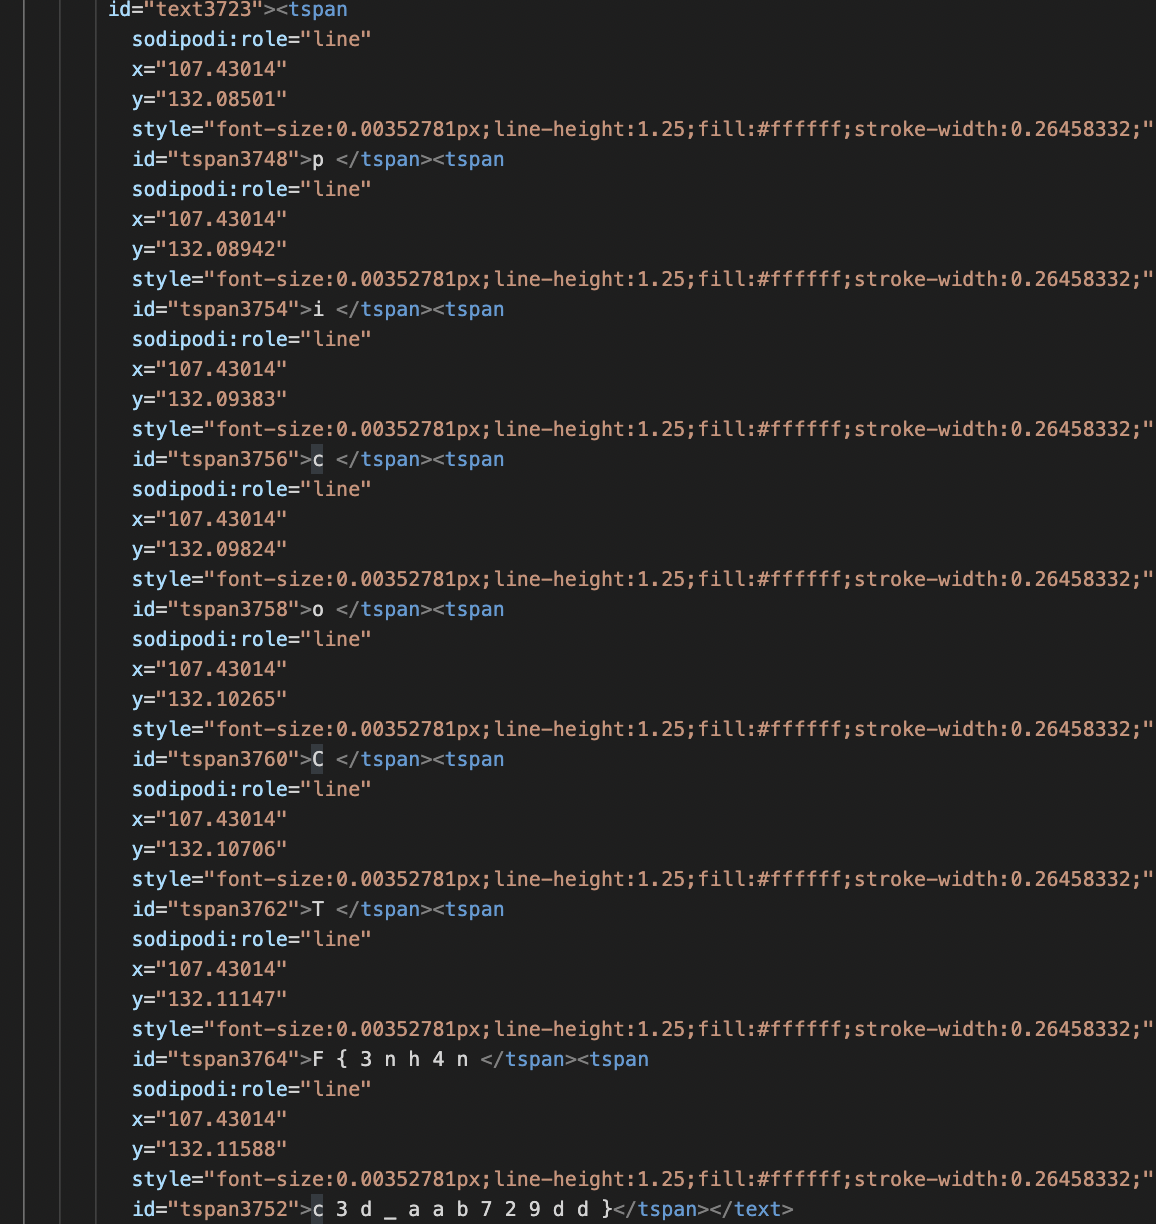

In [19]:
%matplotlib inline
from IPython.display import Image
Image('enhance.png', width=800, height=800)

Flag: picoCTF{3nh4nc3d_aab729dd}

# picoCTF 2022 - File Types

First step was to read the contents of Flag.pdf script (bash). Lines 1-16 explained how to run the script and what it did. Bellow I display my terminal command history as well as pertinent output messages, I used zhell and bash throughout the process (macosX and Fedora).

	> sh Flag.pdf -c
	> file flag
		flag: current ar archive
	
	> man ar
	> ar x flag
	> file flag
		flag: cpio archive
	
	> man cpio
	> cpio -iv < flag
		cpio: flag not created: newer or same age version exists
		flag
		2 blocks
	
	> mv flag res
	> cpio -iv < res
	> file flag
		flag: bzip2 compressed data, block size = 900k
	
	> bzip2 -d flag
		\
		 -> Generated flag.out
	
	> file flag.out
		flag.out: gzip compressed data, was "flag", last modified: Tue Mar 15 06:50:36 2022, from Unix, original size modulo 2^32 329
	
	> mv flag.out flag.out.gz
	> gzip -d flag.out.gz
	> file flag.out
		flag.out: lzip compressed data, version: 1
	
	> lzip -d flag.out
	> file flag.out.out
		flag.out.out: LZ4 compressed data (v1.4+)
	
	> mv flag.out.out flag.lz4
	> lz4 -d flag.lz4
		Decoding file flag 
		flag.lz4             : decoded 266 bytes  
	> file flag
		flag: LZMA compressed data, non-streamed, size 255
	
	> mv flag flag.lzma
	> xz -d flag.lzma
	> file flag
		flag: lzop compressed data - version 1.040, LZO1X-1, os: Unix
	
	> mv flag flag.lzop
	> lzop -d flag.lzop
	> file flag
		flag: lzip compressed data, version: 1
	
	> mv flag flag.lzip
	> lzip -d flag.lzip
	> file flag.lzip.out
		flag.lzip.out: XZ compressed data, checksum CRC64
	
	> mv flag.lzip.out flag.xz
	> xz -d flag.xz
	> file flag
		flag: ASCII text
	> cat flag
		7069636f4354467b66316c656e406d335f6d406e3170756c407431306e5f
		6630725f3062326375723137795f33633739633562617d0a	

	Tried to decompress with base64, but it didn't work. After thinking about it I figured out it was hexdump.
	Running the command hexdump/xxd confirmed this.

	> hexdump flag
		0000000 3037 3936 3336 6636 3334 3435 3634 6237
		0000010 3636 3133 6336 3536 6536 3034 6436 3333
  				(....)

	Since the flag was a hexdump, using xxd -r the flag could be reverted back to binary. Although simply running ´xxd -r flag´ was taking to much time, by reading the man page (man xxd) I found the flag -p that simplified the printing in `postscript continuous hexdump style`, by simply trying the flag was found.

	> xxd -r -p flag
		picoCTF{f1len@m3_m@n1pul@t10n_f0r_0b2cur17y_3c79c5ba}

References:
    - https://en.wikipedia.org/wiki/Ar_(Unix)
    - https://en.wikipedia.org/wiki/Cpio